ЛР5

1. С помощью библиотеки wikipedia выполнить скачивание статей (минимум - три темы на выбор, по каждой теме необходимо найти не менее 15-ти статей)
2. Подсчитать меру TF-IDF для входящих в статьи слов (желательно выполнять предобработку, как на семинаре: приведение к нижнему регистру, удаление стоп-слов и знаков препинания, лемматизация или стемминг)
3. С использованием полученных на 2-ом шаге признаков реализовать определение числа кластеров (метод локтя)
4. Выполнить кластеризацию с использованием алгоритмов:
    1. Иерархической кластеризации
    2. K-means
    3. DBSCAN

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Загрузка стоп-слов и пунктуации
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Привести к нижнему регистру и токенизировать
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /home/bionic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bionic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


word_tokenize(): Эта функция разбивает текст на отдельные слова, или токены. Результатом этой функции будет список, содержащий все слова из текста.

In [75]:
import spacy

# Загрузка языковой модели spaCy
nlp = spacy.load("ru_core_news_sm")

def preprocess_and_lemmatize(text):
    doc = nlp(text.lower())  # Привести к нижнему регистру и лемматизировать
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    return " ".join(lemmatized_words)

# Пример предобработки и лемматизации текста
text = "Машинное обучение - это интересная область, изучаемая многими."
preprocessed_lemmatized_text = preprocess_and_lemmatize(text)
print("Предобработанный и лемматизированный текст:", preprocessed_lemmatized_text)

Предобработанный и лемматизированный текст: машинный обучение это интересный область изучать многими


nlp():
Лемматизация - это процесс приведения слов к их базовой форме, называемой леммой. Например, лемматизация превратит слово "бегал" в "бегать", а "коту" в "кот". Это помогает в унификации форм слова и облегчает анализ текста, игнорируя морфологические особенности.

In [76]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("russian")
text = "Машинное обучение - это интересная область, изучаемая многими."
tokens = word_tokenize(text)
stemmed_words = [stemmer.stem(word) for word in tokens]
print(stemmed_words)

['машин', 'обучен', '-', 'эт', 'интересн', 'област', ',', 'изуча', 'мног', '.']


Стемминг (stemming) - это процесс обработки текста, в ходе которого слова приводятся к своей основной (базовой) форме, называемой стемом. Это достигается путем удаления окончаний и аффиксов слова, чтобы получить его основу.
"бегал", "бегут", "бегающий" -> "бег" (основа: "бег")

Стемминг используется в обработке естественного языка (Natural Language Processing, NLP) для унификации слов и уменьшения размерности признакового пространства текста. Это может быть полезно, например, при анализе текста, классификации или поиске информации.


SnowballStemmer - это инструмент для стемминга, который использует алгоритм Портера или его модификации для разных языков.
Этот код поможет вам понять, как слова из исходного текста сводятся к своим основам. Например, "Машинное" станет "машин", "обучение" - "обучен", "изучаемая" - "изуча".

In [77]:
import pandas as pd
import wikipedia

articles=['Mathematics', 'History', 'Geography', 'Literature', 
          'Physical Education', 'Biology', 'Chemistry',
          'Computer Science', 'Languages', 'Economics', 
          
          'Brazil', 'Germany', 'Argentina', 'France', 
          'England', 'Netherlands', 'Belgium', 
          'Uruguay', 'Mexico', 'Croatia', 'Sweden','Japan',
          
          'Football',  'pitch',
          'match', 'referee', 'stadium', 'dribble',
          'pass', 'tackle', 'goalpost']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Mathematics
loading content:  History
loading content:  Geography
loading content:  Literature
loading content:  Physical Education
loading content:  Biology
loading content:  Chemistry
loading content:  Computer Science
loading content:  Languages
loading content:  Economics
loading content:  Brazil
loading content:  Germany
loading content:  Argentina
loading content:  France
loading content:  England
loading content:  Netherlands
loading content:  Belgium
loading content:  Uruguay
loading content:  Mexico
loading content:  Croatia
loading content:  Sweden
loading content:  Japan
loading content:  Football
loading content:  pitch
loading content:  match
loading content:  referee
loading content:  stadium
loading content:  dribble
loading content:  pass
loading content:  tackle
loading content:  goalpost
examine content


['Mathematics is an area of knowledge that includes the topics of numbers, formulas and related structures, shapes and the spaces in which they are contained, and quantities and their changes. These topics are represented in modern mathematics with the major subdisciplines of number theory, algebra, geometry, and analysis, respectively. There is no general consensus among mathematicians about a common definition for their academic discipline.\nMost mathematical activity involves the discovery of properties of abstract objects and the use of pure reason to prove them. These objects consist of either abstractions from nature or—in modern mathematics—entities that are stipulated to have certain properties, called axioms. A proof consists of a succession of applications of deductive rules to already established results. These results include previously proved theorems, axioms, and—in case of abstraction from nature—some basic properties that are considered true starting points of the theor

In [79]:
nlp = spacy.load("en_core_web_sm")

def cleaner(txt):
    txt = nlp(txt.lower())  # Привести к нижнему регистру и лемматизировать
    lemmatized_words = [token.lemma_ for token in txt if token.text not in punctuation and token.text not in stopwords.words('english')]
    return " ".join(lemmatized_words)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = cleaner)
#После этого векторизуем список текстов wiki_lst с помощью fit_transform() и получаете матрицу TF-IDF X.
X = vectorizer.fit_transform(wiki_lst)

print(vectorizer.get_feature_names_out()) 
#vectorizer.get_feature_names() возвращает список признаков, которые были извлечены из текста в результате векторизации.
print(X.shape)
#выводит размерность матрицы X, где количество строк соответствует количеству документов, а
#количество столбцов - количеству уникальных признаков (слов или токенов).

['00' '000' '001' ... '日本' '日本國' '蹴鞠']
(31, 17794)


функция предварительной обработки Cleaner используется для удаления шума или ненужной информации из текста

TfidfVectorizer используется для преобразования текстовых данных в числовые признаки с использованием метода TF-IDF (Term Frequency-Inverse Document Frequency).

TF-IDF (Term Frequency-Inverse Document Frequency) - это статистическая мера, используемая для оценки важности термина в контексте коллекции документов или корпуса текстов.
Основная идея заключается в том, чтобы найти термины, которые наиболее характерны для определенного документа относительно остальных документов в корпусе.
TF (Частота термина)
IDF (Обратная частота документа)
IDF оценивает, насколько уникальным является термин в пределах корпуса документов.
Термины, которые встречаются в многих документах, считаются менее важными.
TF-IDF (TF-IDF взвешенное среднее):
TF-IDF комбинирует TF и IDF для оценки важности термина в контексте конкретного документа и всего корпуса.)
TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)
Таким образом, термины с высоким TF-IDF значением обычно встречаются часто внутри конкретного документа (высокий TF), но редко встречаются в других документах (низкий IDF), что делает их более информативными для этого документа. TF-IDF широко используется в задачах обработки естественного языка, информационного поиска и классификации текстов для выделения ключевых слов и снижения размерности данных.

In [80]:
print(X[0,])

  (0, 13522)	0.002288051045175878
  (0, 15100)	0.0021397013729855573
  (0, 4002)	0.004162026849381724
  (0, 13627)	0.0015564934668561908
  (0, 13951)	0.004793130641190221
  (0, 5574)	0.0033669301032872214
  (0, 3605)	0.0024520439994618836
  (0, 5729)	0.005240905907493067
  (0, 13993)	0.005872009699301565
  (0, 8934)	0.003218580431096901
  (0, 16129)	0.004793130641190221
  (0, 696)	0.0026353725249675343
  (0, 3703)	0.005872009699301565
  (0, 1420)	0.0023678887227836314
  (0, 550)	0.003218580431096901
  (0, 4287)	0.003922092323319156
  (0, 732)	0.0029585618397070415
  (0, 6618)	0.0023678887227836314
  (0, 638)	0.003922092323319156
  (0, 17482)	0.005872009699301565
  (0, 629)	0.0023678887227836314
  (0, 15338)	0.005240905907493067
  (0, 9804)	0.005872009699301565
  (0, 1873)	0.005872009699301565
  (0, 681)	0.002541010697179626
  :	:
  (0, 4432)	0.01961046161659578
  (0, 7364)	0.013157779471169886
  (0, 13879)	0.005082021394359252
  (0, 1889)	0.06759018905303492
  (0, 7425)	0.2444496627007

Иерархическая кластеризация:<br>
Принцип работы: <br>
Этот метод строит иерархию кластеров, разбивая данные на множество уровней вложенных кластеров.
<br>На каждом уровне кластеры могут объединяться или разделяться в зависимости от заданного критерия.
<br>Типы иерархической кластеризации:
<br>Агломеративная иерархическая кластеризация: Начинает с того, что каждая точка данных представляет собой один кластер, а затем <br>объединяет ближайшие кластеры до тех пор, пока не получится один общий кластер. Это называется "снизу вверх" подходом.
<br>Дивизивная иерархическая кластеризация: Начинает с одного общего кластера и разделяет его на более мелкие кластеры до тех пор, пока <br>каждая точка данных не будет представлять собой отдельный кластер. Это называется "сверху вниз" подходом.
<br>Преимущества: 
<br>Иерархическая структура кластеров позволяет анализировать данные на разных уровнях детализации, что может быть полезно для <br>интерпретации.
<br>Недостатки: 
<br>Метод может быть вычислительно сложным для больших наборов данных, и выбор оптимального количества кластеров не всегда очевиден.

<br>K-means:
<br>Принцип работы:
<br>Этот метод разбивает данные на заранее заданное количество кластеров, где каждый кластер представляет собой группу точек данных, <br>близких к своему центроиду.
<br>Шаги алгоритма:
<br>Случайным образом выбираются центроиды кластеров.
<br>Каждая точка данных присваивается к ближайшему центроиду.
<br>Пересчитываются центроиды на основе средних значений точек данных, принадлежащих к каждому кластеру.
<br>Шаги 2 и 3 повторяются до тех пор, пока центроиды не стабилизируются или не превысится заданное количество итераций.
<br>Преимущества:
<br>Прост в реализации, эффективен на больших наборах данных, хорошо работает, если кластеры сферические или эллиптические.
<br>Недостатки:
<br>Чувствителен к выбору начальных центроидов, может сойтись к локальному оптимуму, не всегда работает хорошо с кластерами несферической <br>формы.

<br>DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
<br>Принцип работы:
<br>Этот метод идентифицирует кластеры на основе плотности точек данных. Он считает, что кластеры - это области с высокой плотностью точек, <br>разделённые областями с низкой плотностью.
<br>Основные параметры:
<br>epsilon (eps): Максимальное расстояние между двумя точками, чтобы они были считаны соседями.
<br>min_samples: Минимальное количество точек в окрестности радиуса epsilon, чтобы считать область плотной.
<br>Преимущества: 
<br>Может обрабатывать кластеры произвольной формы, способен обнаруживать шум и выбросы, не требует заранее заданного числа кластеров.
<br>Недостатки:
<br>Чувствителен к выбору параметров, включая epsilon и min_samples, может быть вычислительно сложным для больших наборов данных.

<h3>Метод Локтя для K-means</h3>

метод выбора оптимального числа кластеров для алгоритма кластеризации, основанный на визуализации. Он позволяет найти точку, после которой увеличение числа кластеров не приводит к существенному улучшению качества кластеризации.

Вот как работает метод локтя:

1) Выбор алгоритма кластеризации: 
Сначала выбирается алгоритм кластеризации, например, K-means, и определяется диапазон значений числа кластеров, которые вы хотите рассмотреть.

2) Вычисление критерия качества: 
Затем алгоритм кластеризации применяется к данным для различных значений числа кластеров. Для каждого значения числа кластеров вычисляется критерий качества, такой как сумма квадратов расстояний (SSE) или инерция (в случае K-means). Инерция - это сумма квадратов расстояний от каждой точки до центроида её кластера.

3) Визуализация: Затем построите график, на котором по оси X будет отложено количество кластеров, а по оси Y - соответствующий критерий качества.

4) Поиск "локтя" на графике: Обычно на графике будет виден излом (точка изгиба), который напоминает локоть. Это место, где увеличение числа кластеров приводит к уменьшению прироста качества кластеризации. Именно это значение числа кластеров можно считать оптимальным.

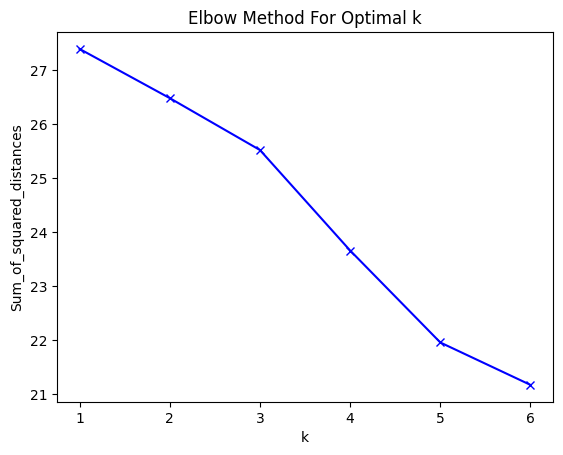

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# список для хранения суммы квадратов расстояний от точек до центроидов для каждого значения 
Sum_of_squared_distances = [] 
K = range(1,7) # Задается диапазон значений кластеров
for k in K:
    km = KMeans(n_clusters=k, max_iter=200) #Создается объект KMeans с заданным количеством кластеров 
    #max_iter, default=300
    #Maximum number of iterations of the k-means algorithm for a single run.
    km = km.fit(X) #  обучение
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances') #оси Y - сумма квадратов расстояний.
plt.title('Elbow Method For Optimal k')
plt.show()

С помощью метода локтя определим, что число кластеров  = 3

In [83]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
0          Mathematics        0
26             stadium        0
23               pitch        0
21               Japan        0
20              Sweden        0
19             Croatia        0
18              Mexico        0
17             Uruguay        0
16             Belgium        0
14             England        0
13              France        0
12           Argentina        0
15         Netherlands        0
10              Brazil        0
1              History        0
11             Germany        0
6            Chemistry        0
3           Literature        0
8            Languages        0
9            Economics        0
7     Computer Science        0
5              Biology        1
4   Physical Education        1
29              tackle        1
2            Geography        1
24               match        1
25             referee        1
28                pass        1
22            Football        2
27             dribble        2
30      

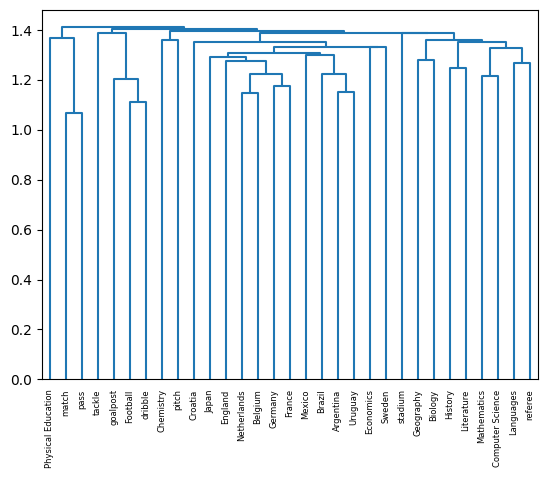

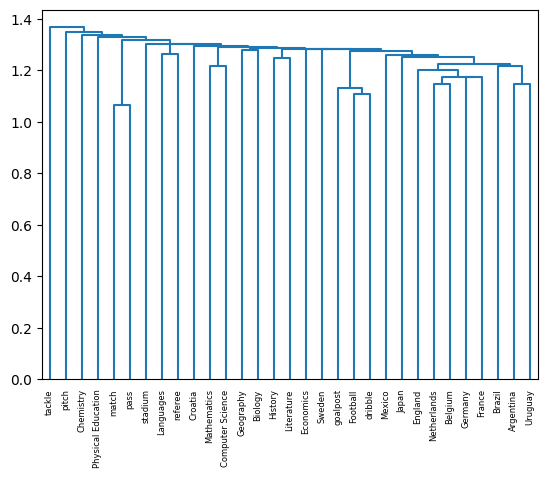

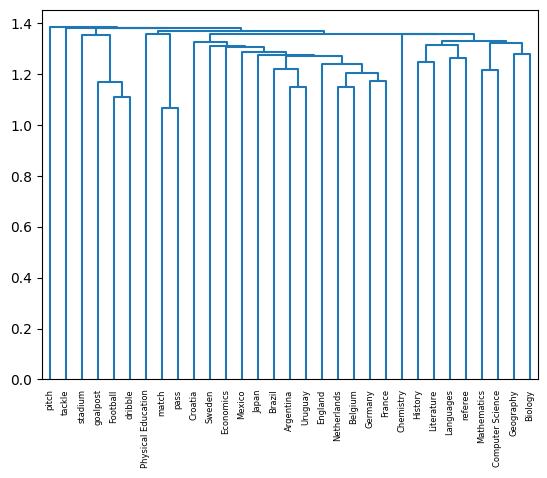

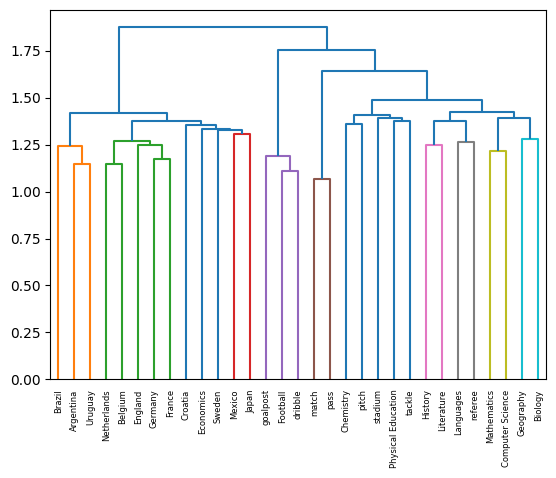

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram
# построения дендрограммы для иерархической кластеризации.


# Ограничиваем число кластеров
max_clusters = 3

#Аргумент mergings представляет собой результат иерархической кластеризации. 
#labels=title используется для отображения меток (заголовков) на листьях дендрограммы, 
#leaf_rotation=90 задает угол поворота меток листьев на 90 градусов для лучшей читаемости,
#а leaf_font_size=6 задает размер шрифта для меток.

#иерархическая кластеризация с помощью функции linkage(). 
#X -   TF-IDF матрицы в обычную массивную форму.
mergings = linkage(X.toarray(), method='complete')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=6,
           p=max_clusters, 
           )

plt.show()

#Высота ветвей дендрограммы: Это расстояние на оси Y, 
#которое представляет собой меру "близости" или "удаленности" между кластерами.
#Чем выше ветвь на дендрограмме, тем ближе кластеры в соответствующей точке соединения.



mergings = linkage(X.toarray(), method='single')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=6,
           p=max_clusters, 
           )

plt.show()


mergings = linkage(X.toarray(), method='average')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=6,
           p=max_clusters, 
           )

plt.show()

mergings = linkage(X.toarray(), method='ward')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=6,
           p=max_clusters, 
           )

plt.show()

In [68]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=3)
# Параметр min_samples в DBSCAN задает минимальное количество точек,
#которые должны находиться в эпсилон-окрестности (окрестность с радиусом eps) 
# Выполняем кластеризацию
dbscan.fit(X)

# Получаем метки кластеров
labels = dbscan.labels_

# Выводим количество кластеров
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Количество кластеров:", n_clusters)

# Выводим метки кластеров
print("Метки кластеров:", labels)
# Выводим объекты и их кластеры
clusters_df = pd.DataFrame({'Title': title, 'Cluster': labels})
print(clusters_df)

Количество кластеров: 2
Метки кластеров: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1]
                 Title  Cluster
0          Mathematics       -1
1              History       -1
2            Geography       -1
3           Literature       -1
4   Physical Education       -1
5              Biology       -1
6            Chemistry       -1
7     Computer Science       -1
8            Languages       -1
9            Economics       -1
10              Brazil       -1
11             Germany        0
12           Argentina       -1
13              France        0
14             England       -1
15         Netherlands        0
16             Belgium        0
17             Uruguay       -1
18              Mexico       -1
19             Croatia       -1
20              Sweden       -1
21               Japan       -1
22            Football        1
23               pitch       -1
24               match       -1
25             referee       -1

In [69]:
def cleaner_stem(txt):
    stemmer = SnowballStemmer("russian")
    tokens = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_words)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = cleaner_stem)
#После этого векторизуем список текстов wiki_lst с помощью fit_transform() и получаете матрицу TF-IDF X.
X = vectorizer.fit_transform(wiki_lst)

print(vectorizer.get_feature_names_out()) 
#vectorizer.get_feature_names() возвращает список признаков, которые были извлечены из текста в результате векторизации.
print(X.shape)
#выводит размерность матрицы X, где количество строк соответствует количеству документов, а
#количество столбцов - количеству уникальных признаков (слов или токенов).

['изуча' 'интересн' 'машин' 'мног' 'област' 'обучен' 'эт']
(31, 7)


In [70]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
0          Mathematics        0
28                pass        0
27             dribble        0
26             stadium        0
25             referee        0
24               match        0
23               pitch        0
22            Football        0
21               Japan        0
20              Sweden        0
19             Croatia        0
18              Mexico        0
17             Uruguay        0
16             Belgium        0
29              tackle        0
15         Netherlands        0
13              France        0
12           Argentina        0
11             Germany        0
10              Brazil        0
9            Economics        0
8            Languages        0
7     Computer Science        0
6            Chemistry        0
5              Biology        0
4   Physical Education        0
3           Literature        0
2            Geography        0
1              History        0
14             England        0
30      

/home/bionic/PycharmProjects/oirs_neuralnetworks/venv/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


/home/bionic/PycharmProjects/oirs_neuralnetworks/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


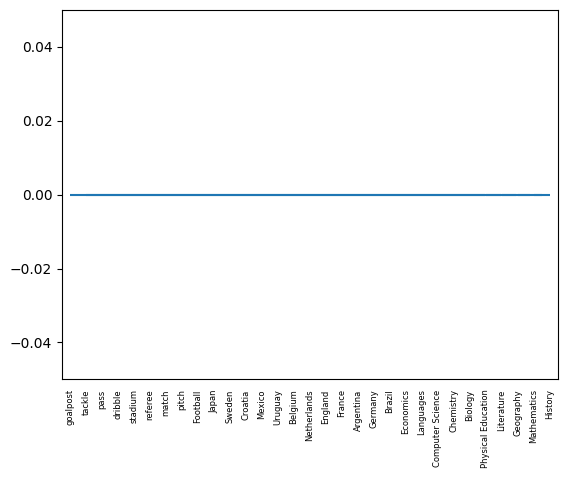

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram
# построения дендрограммы для иерархической кластеризации.


# Ограничиваем число кластеров
max_clusters = 3

#Аргумент mergings представляет собой результат иерархической кластеризации. 
#labels=title используется для отображения меток (заголовков) на листьях дендрограммы, 
#leaf_rotation=90 задает угол поворота меток листьев на 90 градусов для лучшей читаемости,
#а leaf_font_size=6 задает размер шрифта для меток.

#иерархическая кластеризация с помощью функции linkage(). 
#X -   TF-IDF матрицы в обычную массивную форму.
mergings = linkage(X.toarray(), method='complete')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=6,
           p=max_clusters, 
           )

plt.show()

#Высота ветвей дендрограммы: Это расстояние на оси Y, 
#которое представляет собой меру "близости" или "удаленности" между кластерами.
#Чем выше ветвь на дендрограмме, тем ближе кластеры в соответствующей точке соединения.

In [44]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
# Параметр min_samples в DBSCAN задает минимальное количество точек,
#которые должны находиться в эпсилон-окрестности (окрестность с радиусом eps) 
# Выполняем кластеризацию
dbscan.fit(X)

# Получаем метки кластеров
labels = dbscan.labels_

# Выводим количество кластеров
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Количество кластеров:", n_clusters)

# Выводим метки кластеров
print("Метки кластеров:", labels)
# Выводим объекты и их кластеры
clusters_df = pd.DataFrame({'Title': title, 'Cluster': labels})
print(clusters_df)

Количество кластеров: 1
Метки кластеров: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
                 Title  Cluster
0          Mathematics        0
1              History        0
2            Geography        0
3           Literature        0
4   Physical Education        0
5              Biology        0
6            Chemistry        0
7     Computer Science        0
8            Languages        0
9            Economics        0
10              Brazil        0
11             Germany        0
12           Argentina        0
13              France        0
14             England        0
15         Netherlands        0
16             Belgium        0
17             Uruguay        0
18              Mexico        0
19             Croatia        0
20              Sweden        0
21               Japan        0
22            Football        0
23               pitch        0
24               match        0
25             referee        0
26             stadium        0